In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
def generate_noisy_gaussian_random_variates(n_variates, zeta, omega):
    return np.random.normal(loc=0., scale=np.sqrt(zeta+omega), size=n_variates)

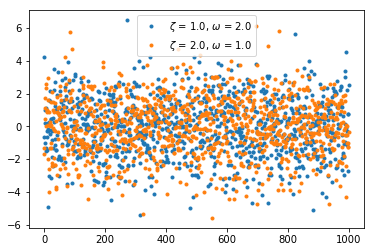

In [3]:
zetas = [1., 2.]
omegas = [2., 1.]
n_variates = 1000
ys_list = []
for zeta, omega in zip(zetas, omegas):
    ys = generate_noisy_gaussian_random_variates(n_variates, zeta, omega)
    ys_list.append(ys)
    plt.plot(ys, '.', label=r"$\zeta$ = {}, $\omega$ = {}".format(zeta, omega))
plt.legend()

As we expect (obviously) the two variates indistinguishable since the variance that enters the Gaussian function is identical in both cases! 

In [4]:
def log_posterior_distribution(ys, zeta, omega):
    n = len(ys)
    return -0.5 * n * np.log(2. * np.pi) - 0.5 * n * np.log(zeta + omega) \
        - 0.5 * np.sum(ys**2)/(zeta + omega) 

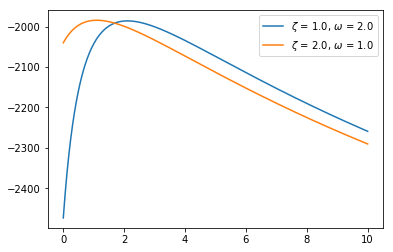

In [5]:
for zeta, omega, ind in zip(zetas, omegas, range(2)):
    o = np.linspace(0, 10, 1000)
    log_prob_o = log_posterior_distribution(ys_list[ind], zeta, o)
    plt.plot(o, log_prob_o, label=r"$\zeta$ = {}, $\omega$ = {}".format(zeta, omega))
plt.legend(loc=0)


## Jeffreys prior on $\omega$

In [6]:
def log_posterior_distribution_jeffreys_omega(ys, zeta, omega):
    n = len(ys)
    return -0.5 * n * np.log(2. * np.pi) - 0.5 * n * np.log(zeta + omega) \
        - 0.5 * np.sum(ys**2)/(zeta + omega) - np.log(omega)

Let us plot the log-posterior ditribution including the Jeffreys prior on omega

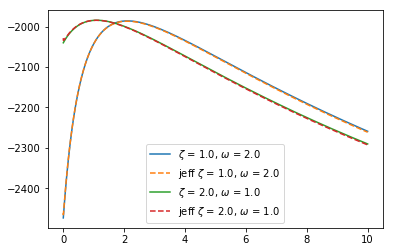

In [7]:
for zeta, omega, ind in zip(zetas, omegas, range(2)):
    o = np.logspace(-5, 1, 1000)
    log_prob_o = log_posterior_distribution(ys_list[ind], zeta, o)
    log_prob_o_p = log_posterior_distribution_jeffreys_omega(ys_list[ind], zeta, o)
    plt.plot(o, log_prob_o, label=r"$\zeta$ = {}, $\omega$ = {}".format(zeta, omega))
    plt.plot(o, log_prob_o_p, '--', label=r"jeff $\zeta$ = {}, $\omega$ = {}".format(zeta, omega))
plt.legend(loc=0)


As we can see the posterior is not that diffrent in these conditions. However, if we carefully examine the posteriro distribution, we can see that the prior term dominates the posterior when the siganl to noise ratio is very low. We can notice a slight peak near zero for the Jeffreys prior for the $\zeta = 2.0, \omega = 1.0$ case. The peak at zero will be come more prominant as the siganl to noise goes down.

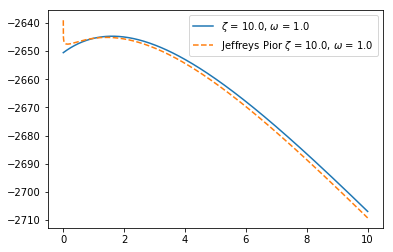

In [8]:
zeta = 10.
omega = 1.
ys = generate_noisy_gaussian_random_variates(n_variates, zeta, omega)
o = np.logspace(-5, 1, 1000)
log_prob_o = log_posterior_distribution(ys, zeta, o)
log_prob_o_p = log_posterior_distribution_jeffreys_omega(ys, zeta, o)
plt.plot(o, log_prob_o, label=r"$\zeta$ = {}, $\omega$ = {}".format(zeta, omega))
plt.plot(o, log_prob_o_p, '--', label=r"Jeffreys Pior $\zeta$ = {}, $\omega$ = {}".format(zeta, omega))
plt.legend(loc=0)

Let us investigate this more carefully at the low signal to noise ratio.

SNR = 0.1


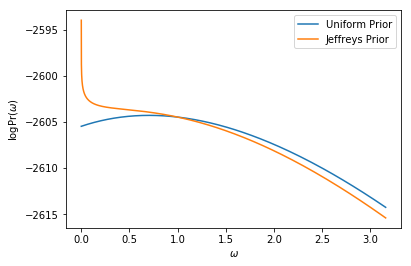

In [15]:
zeta = 10.
omega = 1.
print("SNR = {}".format(omega/zeta))
ys = generate_noisy_gaussian_random_variates(n_variates, zeta, omega)
o = np.logspace(-5, 0.5, 1000)
log_prob_o = log_posterior_distribution(ys, zeta, o)
log_prob_o_p = log_posterior_distribution_jeffreys_omega(ys, zeta, o)
plt.plot(o, log_prob_o, label=r"Uniform Prior".format(omega/zeta))
plt.plot(o, log_prob_o_p, label=r"Jeffreys Prior".format(omega/zeta))
plt.xlabel(r"$\omega$")
plt.ylabel(r"$\log\Pr(\omega)$")
plt.legend(loc=0)
# plt.savefig("log_post_uniform_jeffreys.pdf")

The shape of the log prior is very similar to the shape of the prior at low values of $\omega$

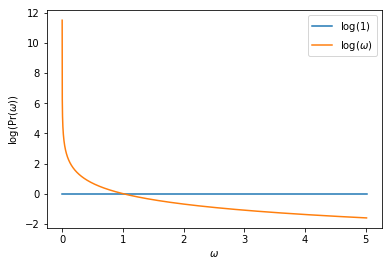

In [10]:
o = np.logspace(-5, 0.7, 1000)
log_prior_u = -np.log(np.ones(len(o)))
log_prior_j = -np.log(o)
plt.plot(o, log_prior_u, label=r"$\log(1)$")
plt.plot(o, log_prior_j, label=r"$\log(\omega)$")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$\log(\Pr(\omega))$")
plt.legend()